# Performing EDA on the South Central US States

In [1]:
import numpy as np 
import pandas as pd 
aimport seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
df = pd.read_csv('dataset-SC.csv', low_memory=False)

In [3]:
df.head()

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,3000.0,NaN,1.0,31.0,warehouse,Non-refrigerated warehouse,3000.0,100124.0,1067.0,NaN,NaN,NaN,NaN
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0,NaN,NaN,NaN,NaN
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0,NaN,NaN,NaN,NaN
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0,NaN,NaN,NaN,NaN
4,Abbeville,Henry County,1.0,AL,1.0,Industrial,NaN,130800.0,NaN,1.0,22.0,no_match,Other,130800.0,100124.0,1067.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398502 entries, 0 to 398501
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  362698 non-null  object 
 1   countyname                 362698 non-null  object 
 2   statefp                    362698 non-null  float64
 3   statecode                  362698 non-null  object 
 4   bldg_count                 362698 non-null  float64
 5   reported_propertytype      362698 non-null  object 
 6   reported_propertysubtype   272648 non-null  object 
 7   rentablebuildingarea_mean  362698 non-null  float64
 8   yearbuilt_mean             300649 non-null  float64
 9   stories                    362698 non-null  float64
 10  index                      362698 non-null  float64
 11  doe_prototype              362698 non-null  object 
 12  cbecs                      362693 non-null  object 
 13  area_sum                   36

In [5]:
df.columns[df.isnull().any()]

Index(['city_name', 'countyname', 'statefp', 'statecode', 'bldg_count',
       'reported_propertytype', 'reported_propertysubtype',
       'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'index',
       'doe_prototype', 'cbecs', 'area_sum', 'placeid', 'countyid',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

## These columns have null values, and hence need to be cleaned. 

In [6]:
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398502 entries, 0 to 398501
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  362698 non-null  object 
 1   countyname                 362698 non-null  object 
 2   statefp                    362698 non-null  float64
 3   statecode                  362698 non-null  object 
 4   bldg_count                 362698 non-null  float64
 5   reported_propertytype      362698 non-null  object 
 6   reported_propertysubtype   272648 non-null  object 
 7   rentablebuildingarea_mean  362698 non-null  float64
 8   yearbuilt_mean             300649 non-null  float64
 9   stories                    362698 non-null  float64
 10  index                      362698 non-null  float64
 11  doe_prototype              362698 non-null  object 
 12  cbecs                      362693 non-null  object 
 13  area_sum                   36

In [8]:
df.isna().sum()

city_name                     35804
countyname                    35804
statefp                       35804
statecode                     35804
bldg_count                    35804
reported_propertytype         35804
reported_propertysubtype     125854
rentablebuildingarea_mean     35804
yearbuilt_mean                97853
stories                       35804
index                         35804
doe_prototype                 35804
cbecs                         35809
area_sum                      35804
placeid                      106047
countyid                      35804
dtype: int64

In [9]:
df = df[df['yearbuilt_mean'].notna()]

In [10]:
df.isna().sum()

city_name                        0
countyname                       0
statefp                          0
statecode                        0
bldg_count                       0
reported_propertytype            0
reported_propertysubtype     75254
rentablebuildingarea_mean        0
yearbuilt_mean                   0
stories                          0
index                            0
doe_prototype                    0
cbecs                            1
area_sum                         0
placeid                      52843
countyid                         0
dtype: int64

In [11]:
df

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0
5,Abbeville,Henry County,1.0,AL,1.0,Industrial,NaN,92000.0,1975.0,1.0,22.0,no_match,Other,92000.0,100124.0,1067.0
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362682,Yoakum,Lavaca County,48.0,TX,1.0,Retail,Freestanding,8400.0,2013.0,1.0,9.0,retail,Retail store,8400.0,4880560.0,48285.0
362693,Yoakum,DeWitt County,48.0,TX,1.0,Retail,NaN,2400.0,2000.0,1.0,45.0,retail,Retail store,2400.0,4880560.0,48123.0
362694,Yoakum,Lavaca County,48.0,TX,1.0,Retail,NaN,46700.0,1975.0,1.0,45.0,retail,Retail store,46700.0,4880560.0,48285.0
362695,Yoakum,Lavaca County,48.0,TX,1.0,Retail,NaN,5700.0,2016.0,1.0,45.0,retail,Retail store,5700.0,4880560.0,48285.0


In [12]:
df = df[df['reported_propertysubtype'].notna()]

In [13]:
df.head()

,city_name,countyname,statefp,statecode,bldg_count,reported_propertytype,reported_propertysubtype,rentablebuildingarea_mean,yearbuilt_mean,stories,index,doe_prototype,cbecs,area_sum,placeid,countyid
1,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,555900.0,1965.0,1.0,31.0,warehouse,Non-refrigerated warehouse,555900.0,100124.0,1067.0
2,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,8500.0,1990.0,1.0,31.0,warehouse,Non-refrigerated warehouse,8500.0,100124.0,1067.0
3,Abbeville,Henry County,1.0,AL,1.0,Industrial,Warehouse,6000.0,2000.0,1.0,31.0,warehouse,Non-refrigerated warehouse,6000.0,100124.0,1067.0
7,Abbeville,Henry County,1.0,AL,1.0,Multi-Family,Apartments,15000.0,1985.0,1.0,33.0,apartment,Apartments,15000.0,100124.0,1067.0
8,Abbeville,Henry County,1.0,AL,1.0,Office,Medical,7800.0,2013.0,1.0,40.0,outpatient,Medical office (diagnostic),7800.0,100124.0,1067.0


In [14]:
df.isna().sum()

city_name                        0
countyname                       0
statefp                          0
statecode                        0
bldg_count                       0
reported_propertytype            0
reported_propertysubtype         0
rentablebuildingarea_mean        0
yearbuilt_mean                   0
stories                          0
index                            0
doe_prototype                    0
cbecs                            0
area_sum                         0
placeid                      40329
countyid                         0
dtype: int64

In [15]:
mean_value = df['placeid'].mean() 

df['placeid'].fillna(value=mean_value) 

1          100124.0
2          100124.0
3          100124.0
7          100124.0
8          100124.0
            ...    
362679    4880560.0
362680    4880560.0
362681    4880560.0
362682    4880560.0
362697    4880560.0
Name: placeid, Length: 225395, dtype: float64

### Fill the placeid with a mean value. 

In [16]:
df.isna().sum()

city_name                        0
countyname                       0
statefp                          0
statecode                        0
bldg_count                       0
reported_propertytype            0
reported_propertysubtype         0
rentablebuildingarea_mean        0
yearbuilt_mean                   0
stories                          0
index                            0
doe_prototype                    0
cbecs                            0
area_sum                         0
placeid                      40329
countyid                         0
dtype: int64

## Performing Univate Analysis on the numerical columns of the dataset.

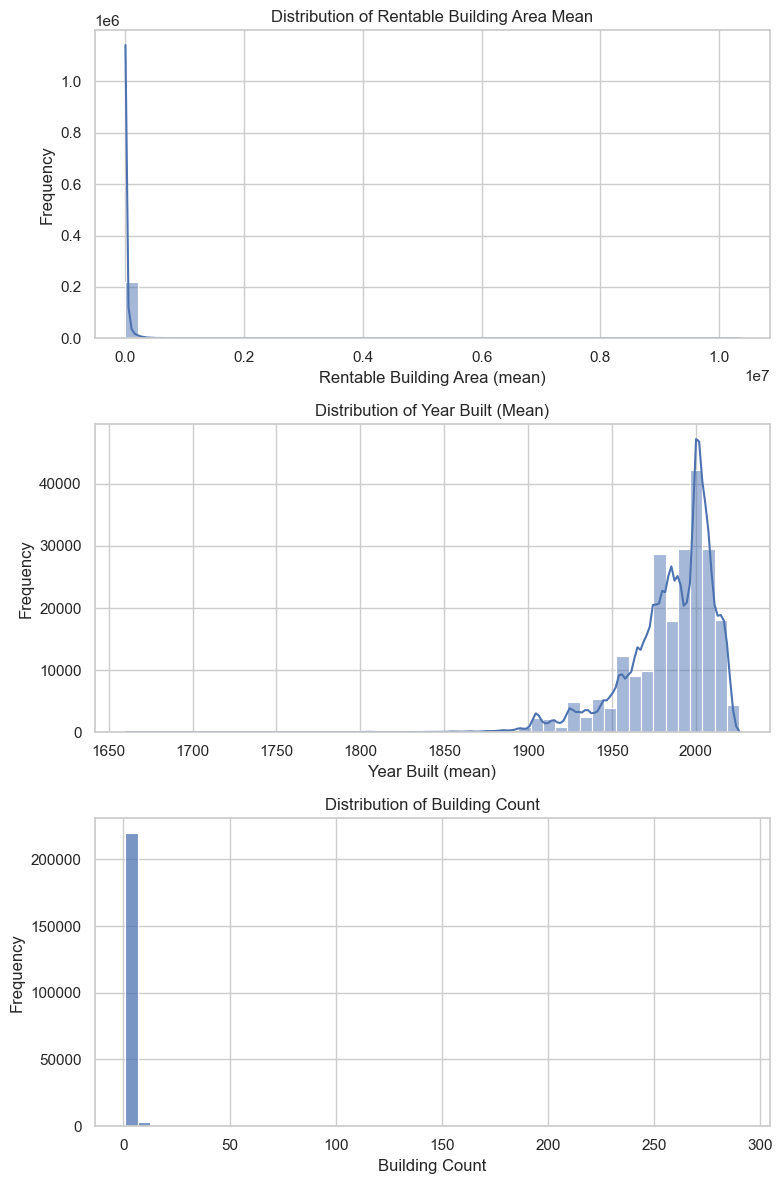

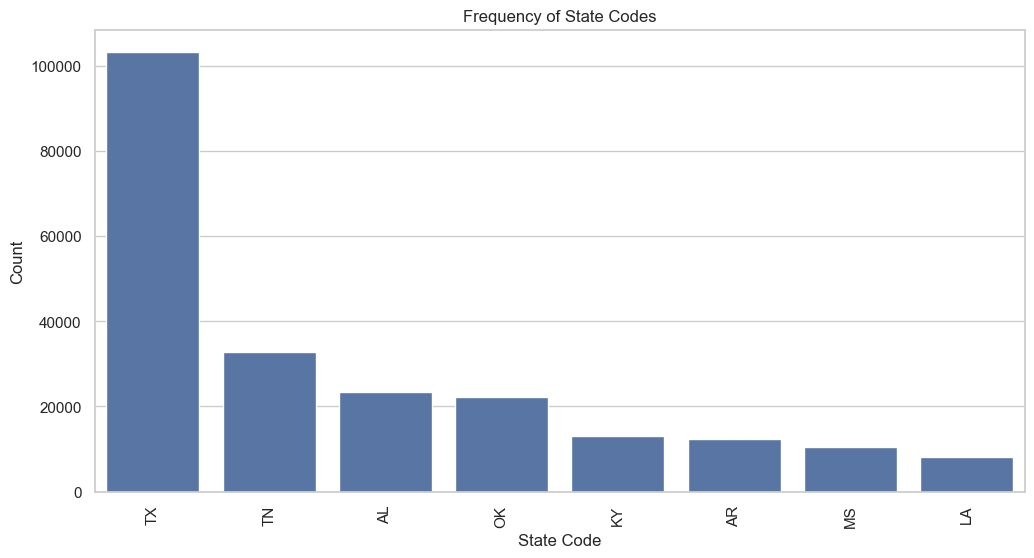

In [26]:
sns.set(style="whitegrid")

# Univariate Analysis: Numerical Data
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Distribution of rentablebuildingarea_mean
sns.histplot(df['rentablebuildingarea_mean'].dropna(), bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Rentable Building Area Mean')
ax[0].set_xlabel('Rentable Building Area (mean)')
ax[0].set_ylabel('Frequency')

# Distribution of yearbuilt_mean
sns.histplot(df['yearbuilt_mean'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Year Built (Mean)')
ax[1].set_xlabel('Year Built (mean)')
ax[1].set_ylabel('Frequency')

# Distribution of bldg_count
sns.histplot(df['bldg_count'].dropna(), bins=50, kde=False, ax=ax[2])
ax[2].set_title('Distribution of Building Count')
ax[2].set_xlabel('Building Count')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Univariate Analysis: Categorical Data - Statecode
plt.figure(figsize=(12, 6))
state_code_counts = df['statecode'].value_counts()
sns.barplot(x=state_code_counts.index, y=state_code_counts.values)
plt.title('Frequency of State Codes')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Observations : 

-> We have a large number of input data for the state of Texas than other states.

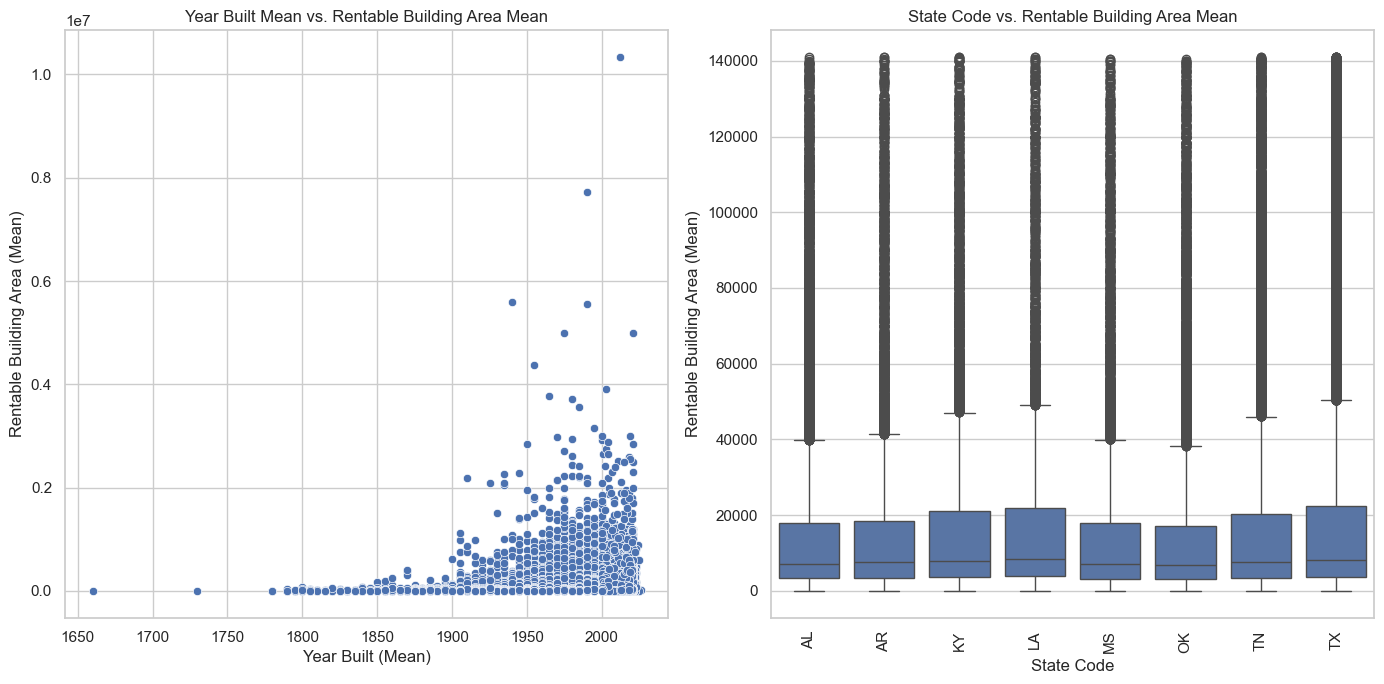

In [18]:
# Bivariate Analysis

# Set up the figure size for plots
plt.figure(figsize=(14, 7))

# Scatter plot between 'rentablebuildingarea_mean' and 'yearbuilt_mean'
plt.subplot(1, 2, 1)
sns.scatterplot(x='yearbuilt_mean', y='rentablebuildingarea_mean', data=df)
plt.title('Year Built Mean vs. Rentable Building Area Mean')
plt.xlabel('Year Built (Mean)')
plt.ylabel('Rentable Building Area (Mean)')

# Boxplot for 'statecode' vs 'rentablebuildingarea_mean' to see distribution across states
plt.subplot(1, 2, 2)
state_code_sample = df[df['rentablebuildingarea_mean'] < df['rentablebuildingarea_mean'].quantile(0.95)]  # Limiting to 95th percentile for clearer visualization
sns.boxplot(x='statecode', y='rentablebuildingarea_mean', data=state_code_sample)
plt.title('State Code vs. Rentable Building Area Mean')
plt.xlabel('State Code')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Observation : 

-> Building built in after 2000s have a greater rent than those built before that.

-> Buildings in the manufacturing segment in **Mississippi** have the most amount of rentable area


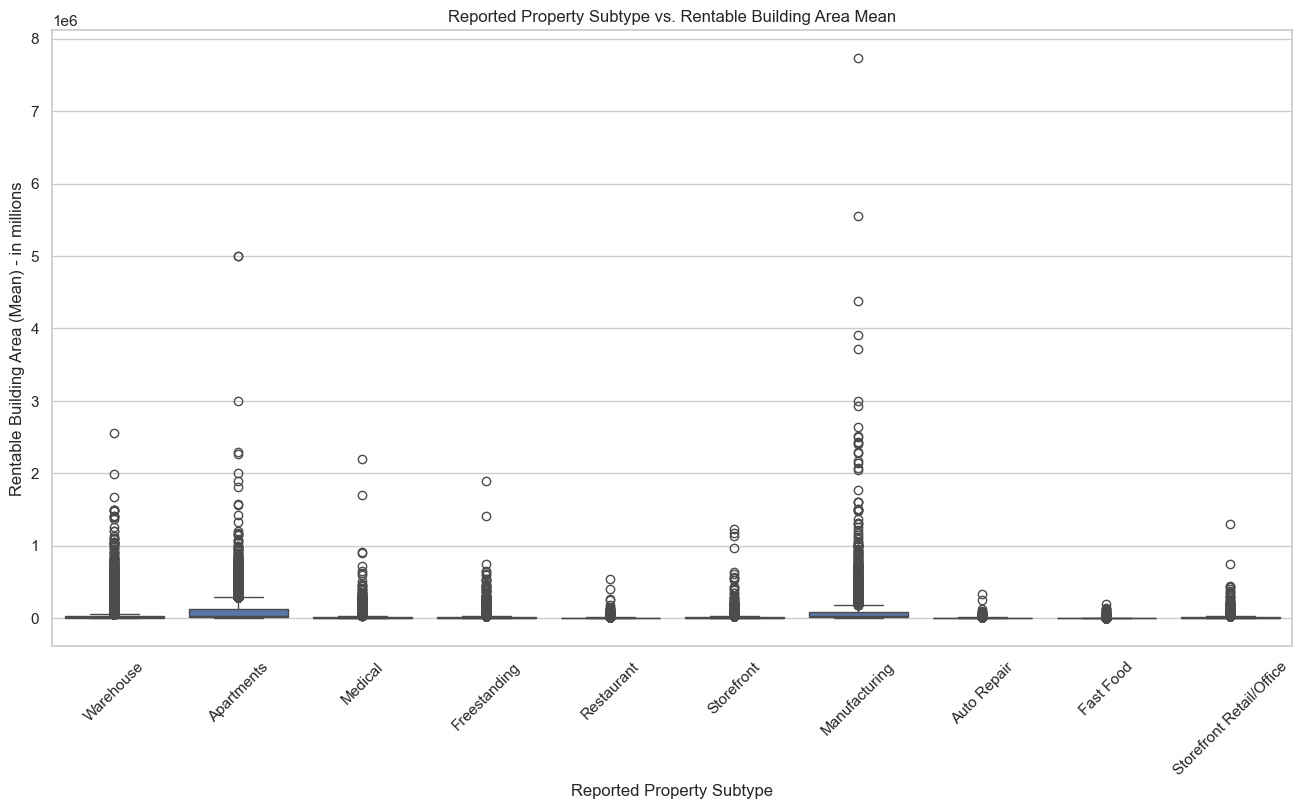

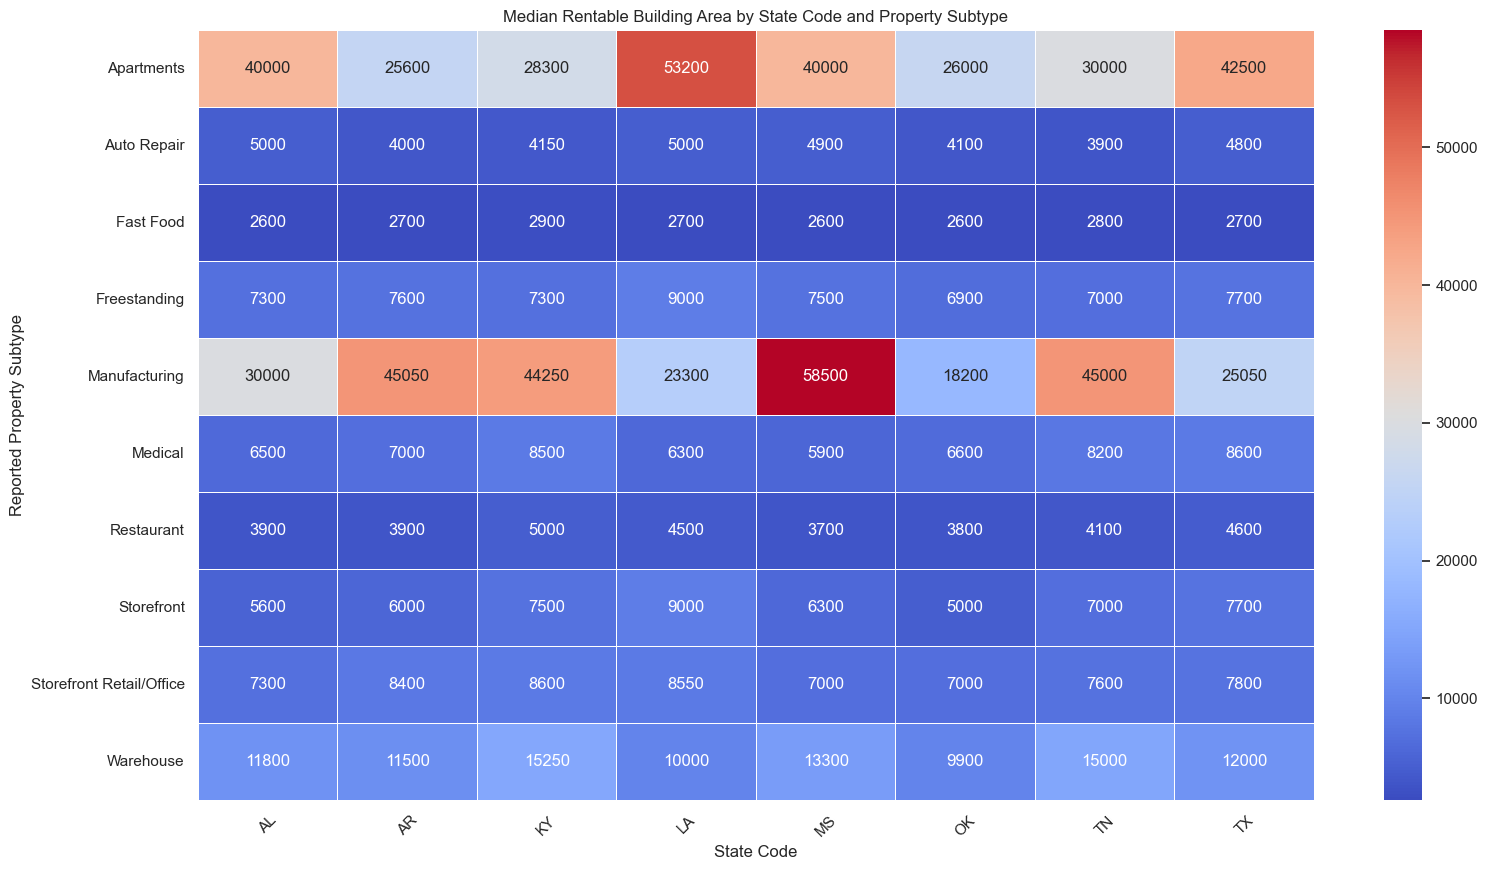

In [27]:
# Bivariate Analysis: 'reported_propertysubtype' vs 'rentablebuildingarea_mean'

# Filtering data to manage the size and make visualization clearer by focusing on the most common subtypes
common_subtypes = df['reported_propertysubtype'].value_counts().head(10).index
filtered_data_subtype = df[df['reported_propertysubtype'].isin(common_subtypes)]

plt.figure(figsize=(16, 8))

# Boxplot for 'reported_propertysubtype' vs 'rentablebuildingarea_mean'
sns.boxplot(x='reported_propertysubtype', y='rentablebuildingarea_mean', data=filtered_data_subtype)
plt.title('Reported Property Subtype vs. Rentable Building Area Mean')
plt.xlabel('Reported Property Subtype')
plt.ylabel('Rentable Building Area (Mean) - in millions')
plt.xticks(rotation=45)
plt.show()

# Interaction between 'statecode', 'reported_propertysubtype', and 'rentablebuildingarea_mean'
# Creating a pivot table for visualization
pivot_data = filtered_data_subtype.pivot_table(values='rentablebuildingarea_mean', index='reported_propertysubtype', columns='statecode', aggfunc='median')
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_data, annot=True, fmt=".0f", linewidths=.5, cmap='coolwarm')
plt.title('Median Rentable Building Area by State Code and Property Subtype')
plt.xlabel('State Code')
plt.ylabel('Reported Property Subtype')
plt.xticks(rotation=45)
plt.show()


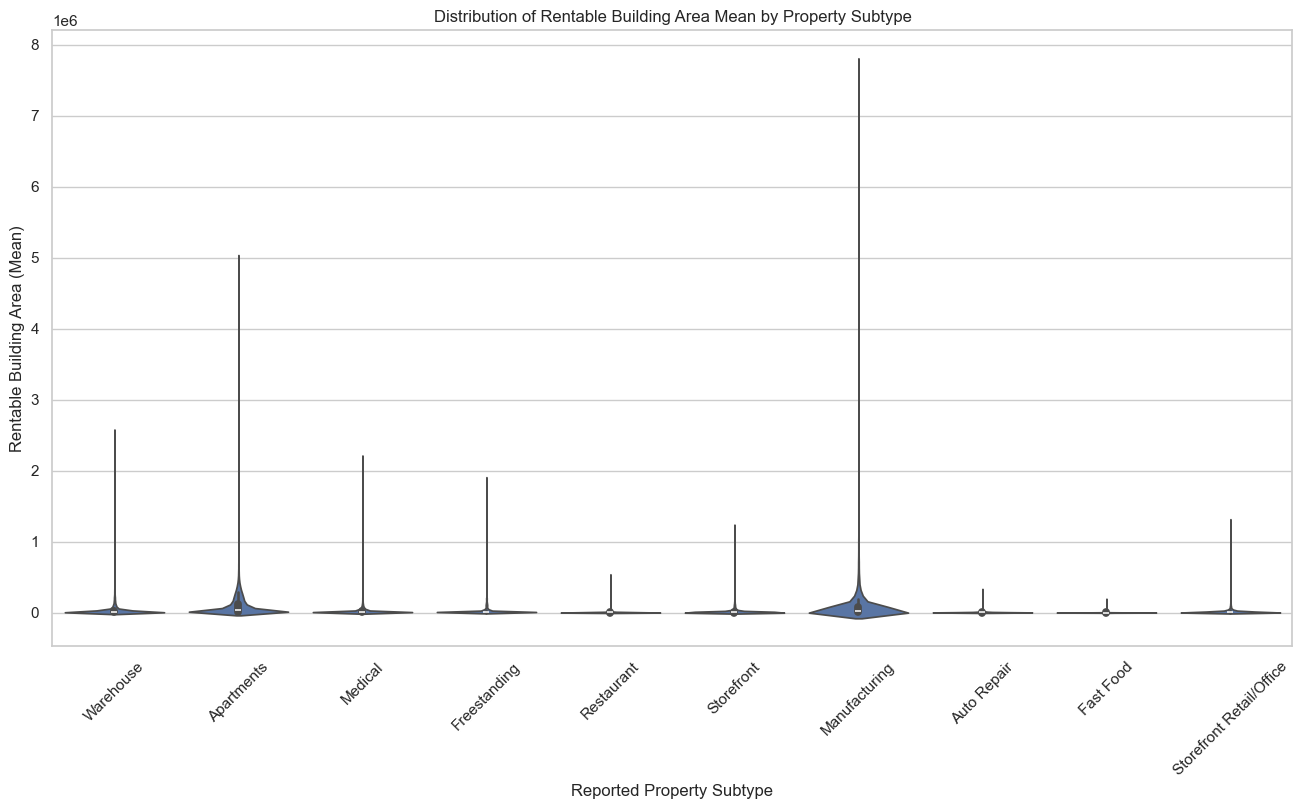

In [20]:
# Let's use a violin plot to better visualize the distribution of 'rentablebuildingarea_mean' across different 'reported_propertysubtype'

plt.figure(figsize=(16, 8))
sns.violinplot(x='reported_propertysubtype', y='rentablebuildingarea_mean', data=filtered_data_subtype, density_norm='width')
plt.title('Distribution of Rentable Building Area Mean by Property Subtype')
plt.xlabel('Reported Property Subtype')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=45)
plt.show()


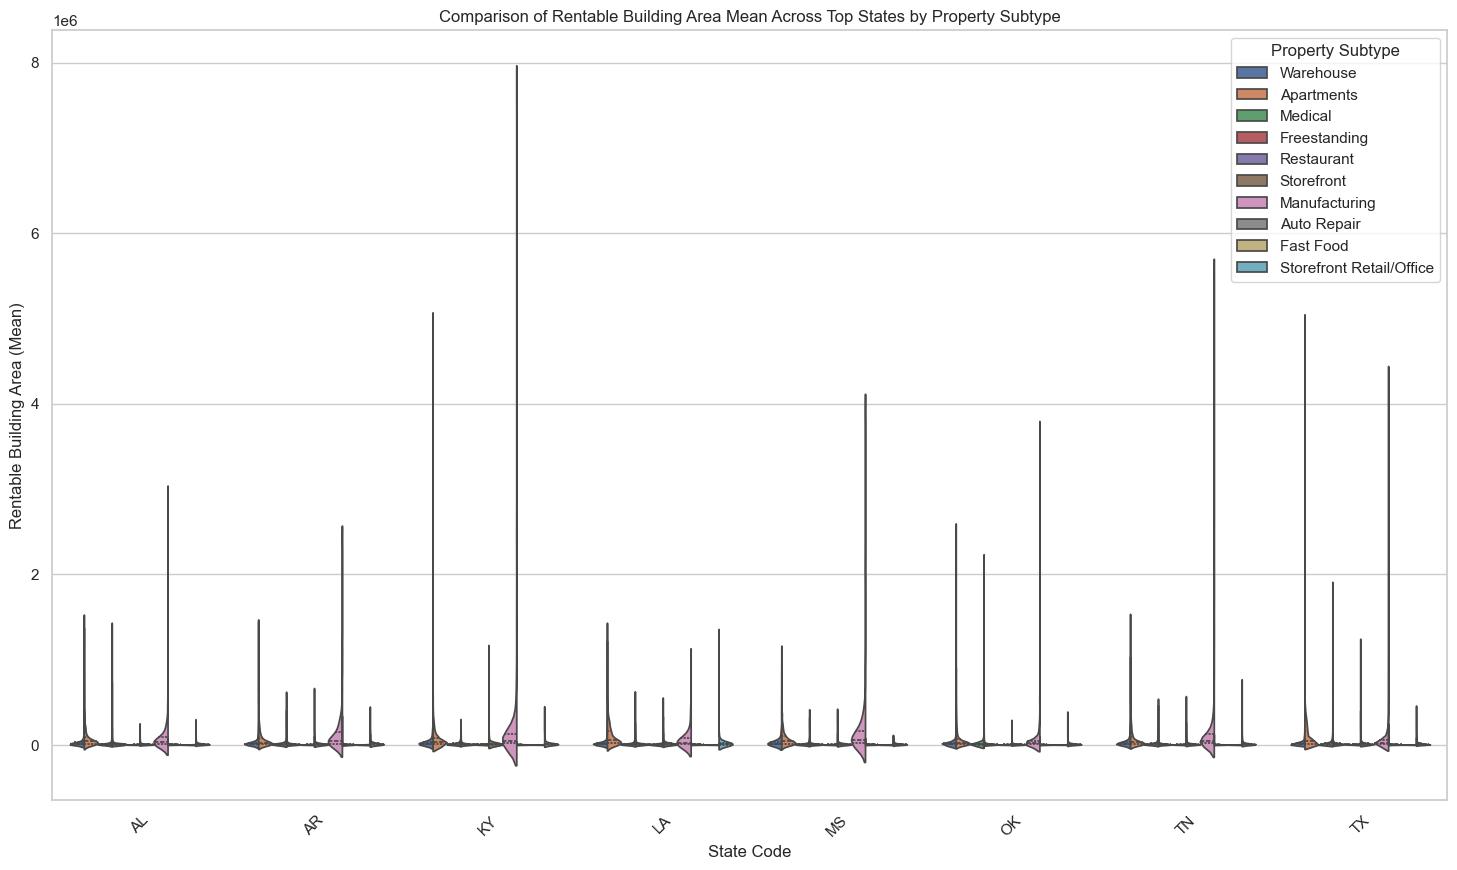

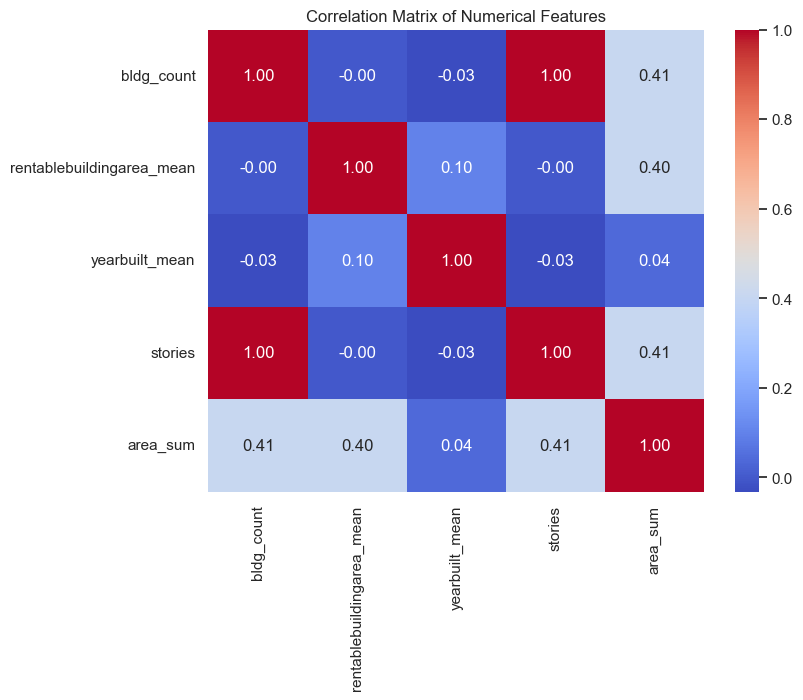

In [21]:
# Comparison Across States for the top common subtypes

# Let's create a larger subset of states to visualize the comparison
state_comparison_data = df[df['statecode'].isin(df['statecode'].value_counts().head(10).index) &
                                   df['reported_propertysubtype'].isin(common_subtypes)]

plt.figure(figsize=(18, 10))
sns.violinplot(x='statecode', y='rentablebuildingarea_mean', hue='reported_propertysubtype',
               data=state_comparison_data, split=True, density_norm='width', inner='quartile')
plt.title('Comparison of Rentable Building Area Mean Across Top States by Property Subtype')
plt.xlabel('State Code')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=45)
plt.legend(title='Property Subtype')
plt.show()

# Correlation Analysis
# Select numerical columns to compute correlation
numerical_cols = ['bldg_count', 'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'area_sum']
correlation_matrix = df[numerical_cols].corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


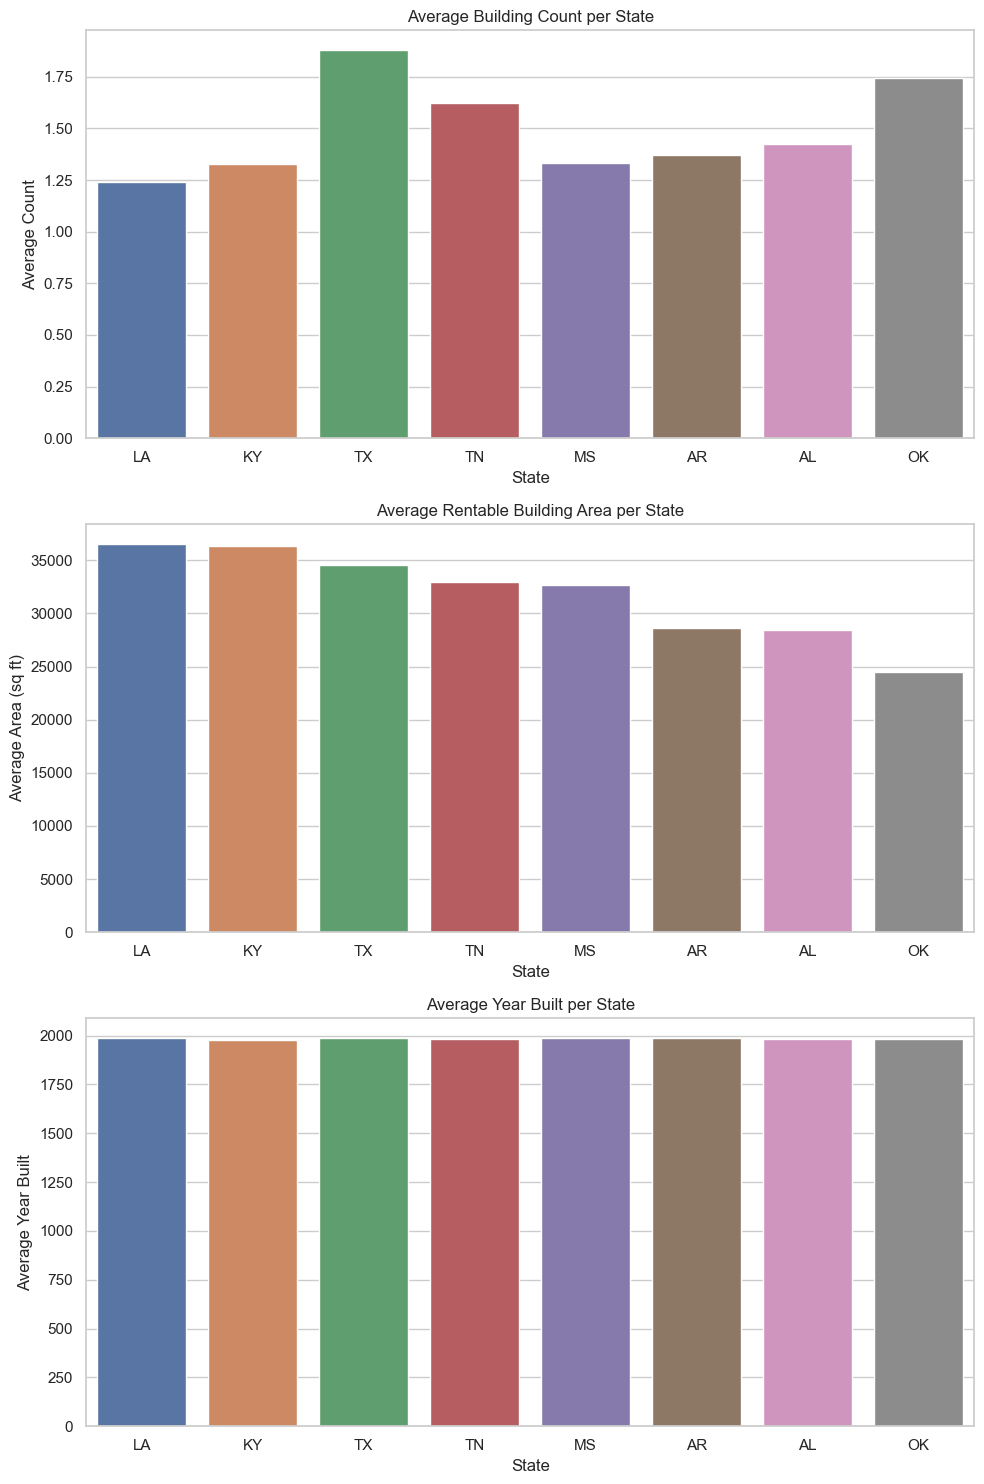

In [22]:
# Grouping data by statecode and calculating mean for key variables
state_grouped = df.groupby('statecode').agg({
    'bldg_count': 'mean',
    'rentablebuildingarea_mean': 'mean',
    'yearbuilt_mean': 'mean'
}).sort_values(by='rentablebuildingarea_mean', ascending=False)

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x=state_grouped.index, y=state_grouped['bldg_count'], ax=ax[0], hue = state_grouped.index)
ax[0].set_title('Average Building Count per State')
ax[0].set_ylabel('Average Count')
ax[0].set_xlabel('State')

sns.barplot(x=state_grouped.index, y=state_grouped['rentablebuildingarea_mean'], ax=ax[1], hue = state_grouped.index)
ax[1].set_title('Average Rentable Building Area per State')
ax[1].set_ylabel('Average Area (sq ft)')
ax[1].set_xlabel('State')

sns.barplot(x=state_grouped.index, y=state_grouped['yearbuilt_mean'] , ax=ax[2], hue = state_grouped.index)
ax[2].set_title('Average Year Built per State')
ax[2].set_ylabel('Average Year Built')
ax[2].set_xlabel('State')

plt.tight_layout()
plt.show()


## Observations : 

-> Los Angeles has the greatest average rentable building area followed by Kentucky and Texas

-> Texas and Oklahama have the highest building count among the others.

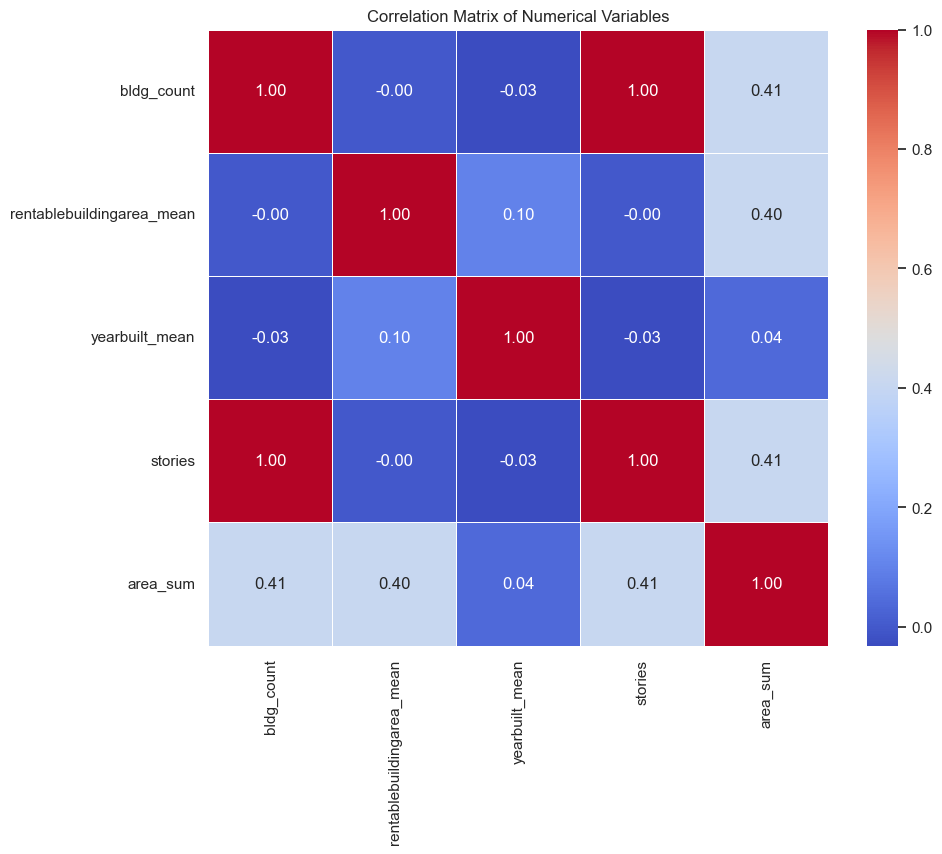

In [28]:
# Selecting numerical variables for correlation analysis
numerical_data = df[['bldg_count', 'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'area_sum']]

# Computing the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_14992\3342478996.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, palette='viridis')


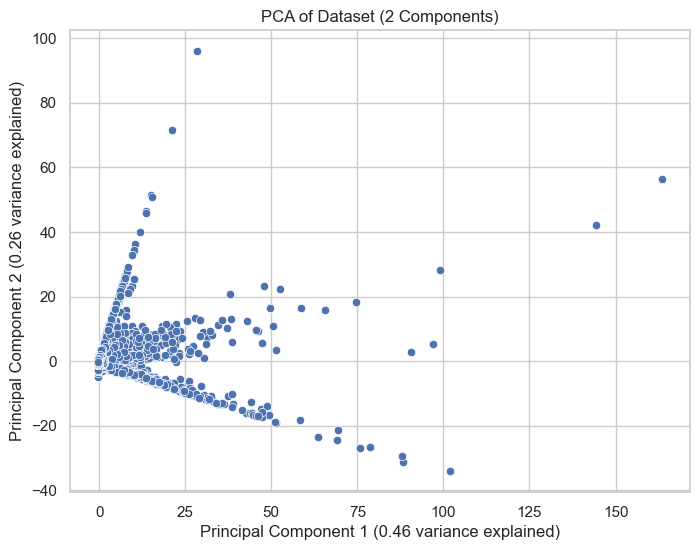

(None, array([0.4566265 , 0.25783977]))

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the data before PCA
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(n_components=2)  # We reduce the dimension to 2 for visualization purposes
principal_components = pca.fit_transform(scaled_numerical_data)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plotting the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, palette='viridis')
plt.title('PCA of Dataset (2 Components)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance explained)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance explained)')
plt.grid(True)
plt.show(), explained_variance


In [25]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# We will perform a multiple regression analysis to see how well we can predict rentable building area
# based on other variables: year built, stories, and building count.

# Preparing the independent variables (X) and dependent variable (y)
X = numerical_data[['yearbuilt_mean', 'stories', 'bldg_count']]
y = numerical_data['rentablebuildingarea_mean']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     rentablebuildingarea_mean   R-squared:                       0.010
Model:                                   OLS   Adj. R-squared:                  0.010
Method:                        Least Squares   F-statistic:                     1099.
Date:                       Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                               11:00:30   Log-Likelihood:            -2.9019e+06
No. Observations:                     225395   AIC:                         5.804e+06
Df Residuals:                         225392   BIC:                         5.804e+06
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.752e+05   1.51e+04    -44.692      0.000   -7.05e+05   -6.46e+05
yearbuilt_mean   356.4791      7.608     46.854      0.000     341.567     371.391
stories           -0.7774     27.217     -0.029      0.977     -54.121      52.566
bldg_count        -0.7774     27.217     -0.029      0.977     -54.121      52.566
==============================================================================
Omnibus:                   507493.116   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13490498219.580
Skew:                          20.759   Prob(JB):                         0.00
Kurtosis:                    1200.807   Cond. No.                     1.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.2e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""